In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import os
import pickle
import simulation_parameters as P

In [2]:
START_CHANNELS = 6
HIGHCOUNT_N_EVENTS = int(-1)
LOWCOUNT_N_EVENTS = int(35e6)
LOWCOUNT_N_ITERS_INIT = 80
LOWCOUNT_N_SUBSETS_INIT = 1
LOWCOUNT_TOF = 'nonTOF'

In [3]:
lc_recon= np.load('/disk1/pet_dip_recon/pet_recon_35000000events_osem_80it1ss.npy')
lc_recon_noTOF= np.load(
       os.path.join(P.SAVE_PATH, f'pet_recon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT }it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}.npy')
       )
hc_recon = np.load('/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ss.npy')
hc_recon_noTOF = np.load('/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ssnonTOF.npy')
dip_recon = np.load('/disk1/pet_dip_recon/dip_recon_100it_2subit1_10subit2_50000.0rho_0.4lr_20lbfgsiter_initpetrecon_35000000events_osem_80it1ss.npy')
dip_recon_noTOF = np.load(
       os.path.join(P.SAVE_PATH, f'dip_recon_{P.N_ITERS_DIP}it_{P.N_SUBITERS1_DIP}subit1_{P.N_SUBITERS2_DIP}subit2_{P.RHO}rho_{P.LR_RECON}lr_{P.LBFGS_MAX_ITER}lbfgsiter_initpetrecon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT}it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}_initchannels{START_CHANNELS}.npy')
       )
GT_recon = np.load(os.path.join(P.SAVE_PATH, 'pet_aligned.npy'))
MRI = np.load(os.path.join(P.SAVE_PATH, 'mri_aligned.npy'))
ims_TOF = [MRI,
       GT_recon,
       hc_recon*GT_recon.sum()/hc_recon.sum(),
       lc_recon*GT_recon.sum()/lc_recon.sum(),
       dip_recon*GT_recon.sum()/dip_recon.sum(),]
ims_nonTOF = [MRI,
       GT_recon,
       hc_recon_noTOF*GT_recon.sum()/hc_recon_noTOF.sum(),
       lc_recon_noTOF*GT_recon.sum()/lc_recon_noTOF.sum(),
       dip_recon_noTOF*GT_recon.sum()/dip_recon_noTOF.sum(),]
labels = ['MRI', 'Truth', 'High Count (OSEM)', 'Low Count (OSEM)', 'Low Count (DIP)']

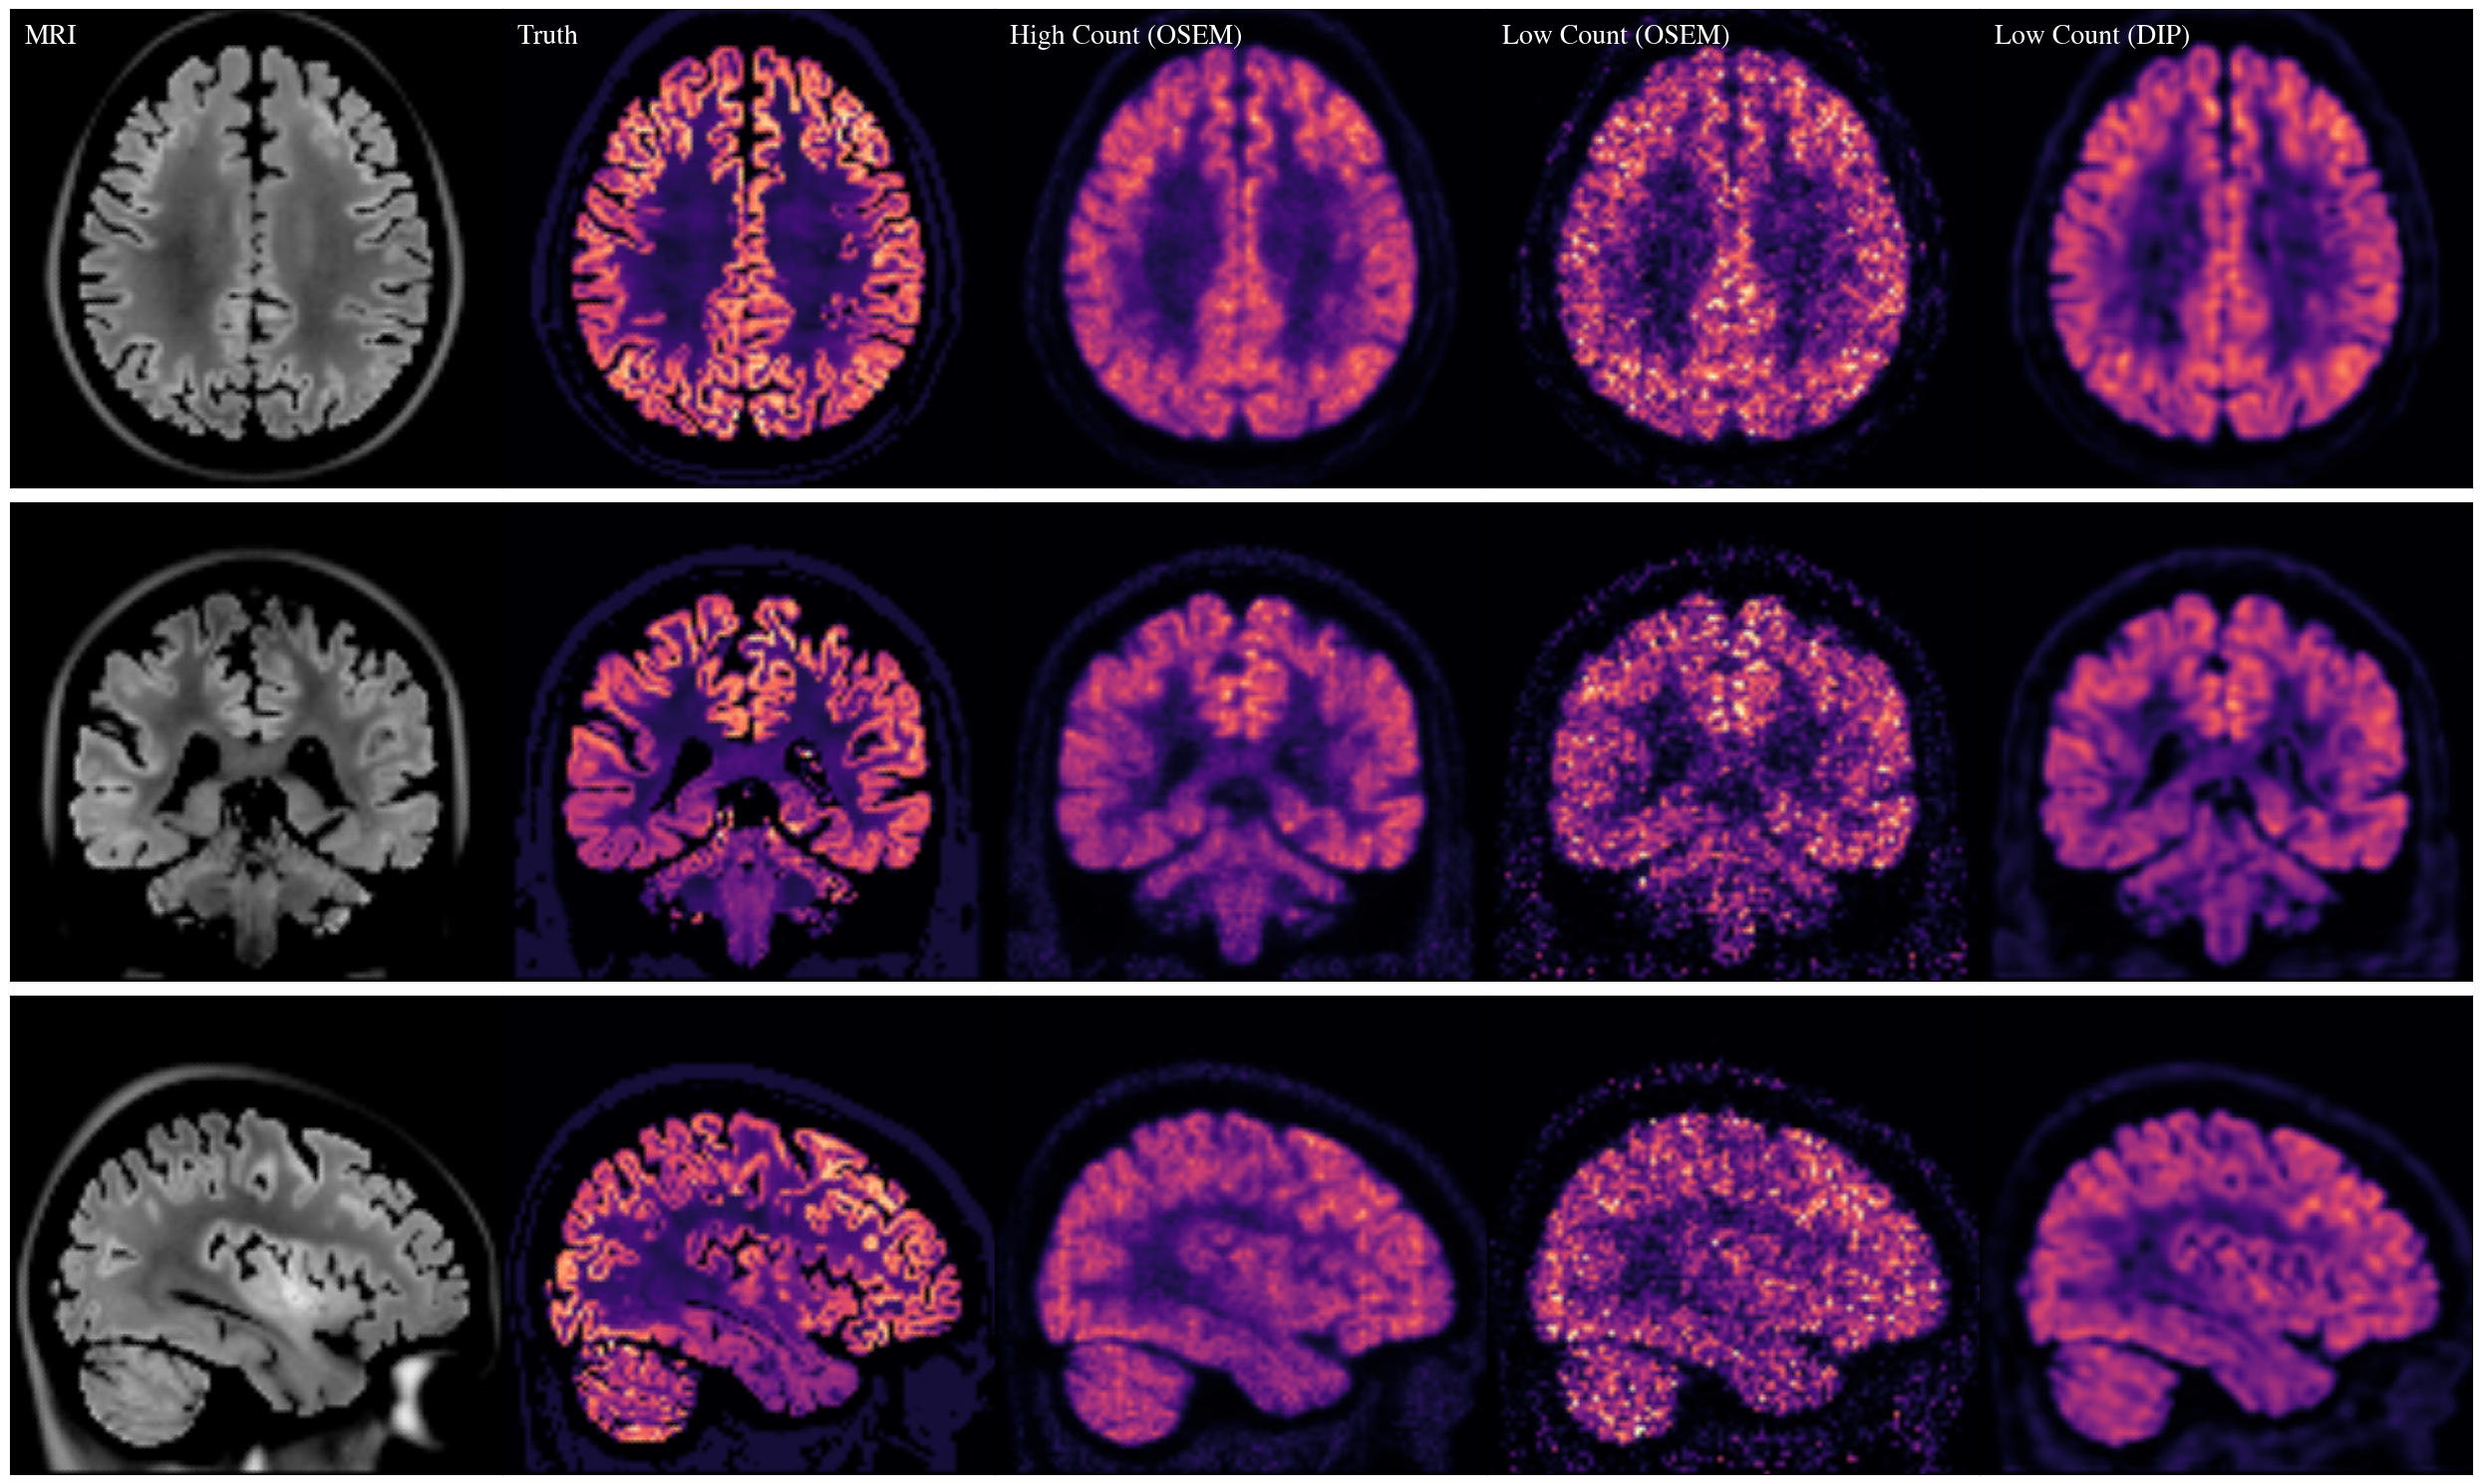

In [8]:
slc = 53
slc_cor = 45
ww = 16
gridspec = dict(wspace=0.0)
cmap = 'magma'
vmax=1.3
ims = ims_nonTOF
fig, ax = plt.subplots(3,5, figsize=(25,15), gridspec_kw=gridspec)
for i, (im, a) in enumerate(zip(ims, ax[0])):
    plt.sca(a)
    if i==0:
        plt.pcolormesh(im[ww:-ww,ww:-ww,slc].T, cmap='Greys_r', vmin=120, vmax=250, shading='gouraud')
        plt.text(0.03,0.93,labels[i], fontsize=20, color='white', transform = a.transAxes)
    else:
        plt.pcolormesh(im[ww:-ww,ww:-ww,slc].T, cmap=cmap, shading='gouraud', vmax=vmax)
        plt.text(0.03,0.93,labels[i], fontsize=20, color='white', transform = a.transAxes)
    a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for i, (im, a) in enumerate(zip(ims, ax[1])):
    plt.sca(a)
    if i==0:
        plt.pcolormesh(im[ww:-ww,slc].T, cmap='Greys_r', vmin=120, vmax=250, shading='gouraud')
    else:
        plt.pcolormesh(im[ww:-ww,slc].T, cmap=cmap, shading='gouraud', vmax=vmax)
    a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for i, (im, a) in enumerate(zip(ims, ax[2])):
    plt.sca(a)
    if i==0:
        plt.pcolormesh(im[slc_cor,ww:-ww].T, cmap='Greys_r', vmin=120, vmax=250, shading='gouraud')
    else:
        plt.pcolormesh(im[slc_cor,ww:-ww].T, cmap=cmap, shading='gouraud', vmax=vmax)
    a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
fig.tight_layout()
plt.savefig('images/figure5.jpg', dpi=300, bbox_inches='tight')

In [ ]:
lc_recon= np.load('/disk1/pet_dip_recon/pet_recon_35000000events_osem_80it1ss.npy')
lc_recon_noTOF= np.load(
       os.path.join(P.SAVE_PATH, f'pet_recon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT }it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}.npy')
       )
hc_recon = np.load('/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ss.npy')
hc_recon_noTOF = np.load('/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ssnonTOF.npy')
dip_recon = np.load('/disk1/pet_dip_recon/dip_recon_100it_2subit1_10subit2_50000.0rho_0.4lr_20lbfgsiter_initpetrecon_35000000events_osem_80it1ss.npy')
dip_recon_noTOF = np.load(
       os.path.join(P.SAVE_PATH, f'dip_recon_{P.N_ITERS_DIP}it_{P.N_SUBITERS1_DIP}subit1_{P.N_SUBITERS2_DIP}subit2_{P.RHO}rho_{P.LR_RECON}lr_{P.LBFGS_MAX_ITER}lbfgsiter_initpetrecon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT}it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}_initchannels{START_CHANNELS}.npy')
)

In [ ]:
from pytomography.callbacks import Callback
import torch
class CRC_STD_Callback(Callback):
    def __init__(
        self,
    ) -> None:
        self.CRCs = []
        self.STDs = []
        self.biass = []
        self.stds = []
        self.biass_wm = []
        self.stds_wm = []
        self.biass_gm = []
        self.stds_gm = []
    def run(self, object: torch.tensor, n_iter: int):
        CRC = compute_CRC(object.cpu().numpy()[0])
        STD = compute_std(object.cpu().numpy()[0])
        bias, std = compute_mse(object.cpu().numpy()[0], None)
        bias_wm, std_wm = compute_mse(object.cpu().numpy()[0], white_matter_mask_aligned)
        bias_gm, std_gm = compute_mse(object.cpu().numpy()[0], grey_matter_mask_aligned)
        #print(f'CRC: {CRC}')
        #print(f'STD: {STD}')
        print(f'Bias: {np.abs(bias_wm)}')
        print(f'std: {std_wm}')
        self.CRCs.append(CRC)
        self.STDs.append(STD)
        self.biass.append(bias)
        self.stds.append(std)
        self.biass_wm.append(bias_wm)
        self.stds_wm.append(std_wm)
        self.biass_gm.append(bias_gm)
        self.stds_gm.append(std_gm)

In [ ]:
with open(f'/disk1/pet_dip_recon/pet_recon_35000000events_osem_80it1ss_callback', 'rb') as f:
    cb_lowcount = pickle.load(f)
with open(f'/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ss_callback', 'rb') as f:
    cb_highcount = pickle.load(f)
with open(os.path.join(P.SAVE_PATH, f'pet_recon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT }it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}_callback'), 'rb') as f:
    cb_lowcount_nonTOF = pickle.load(f)
with open(f'/disk1/pet_dip_recon/pet_recon_-1events_osem_4it20ssnonTOF_callback', 'rb') as f:
    cb_highcount_nonTOF = pickle.load(f)
with open('/disk1/pet_dip_recon/dip_recon_100it_2subit1_2subit2_50000.0rho_0.4lr_20lbfgsiter_initpetrecon_35000000events_osem_80it1ss_callback', 'rb') as f:
    cb_dip = pickle.load(f)
with open(os.path.join(P.SAVE_PATH, f'dip_recon_{P.N_ITERS_DIP}it_{P.N_SUBITERS1_DIP}subit1_{P.N_SUBITERS2_DIP}subit2_{P.RHO}rho_{P.LR_RECON}lr_{P.LBFGS_MAX_ITER}lbfgsiter_initpetrecon_{LOWCOUNT_N_EVENTS}events_osem_{LOWCOUNT_N_ITERS_INIT}it{LOWCOUNT_N_SUBSETS_INIT}ss{LOWCOUNT_TOF}_initchannels{START_CHANNELS}_callback'), 'rb') as f:
    cb_dip_nonTOF = pickle.load(f)

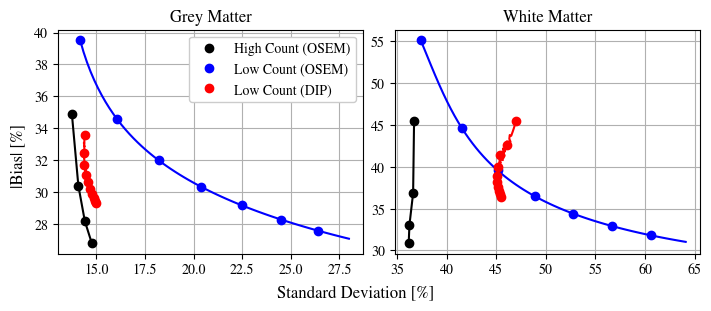

In [ ]:
n = 10
fig, axes = plt.subplots(1,2,figsize=(7,3), layout='constrained')
plt.subplot(121)
plt.plot(100*np.array(cb_highcount_nonTOF.stds_gm[::1]), 100*np.abs(cb_highcount_nonTOF.biass_gm)[::1],  'o', label='High Count (OSEM)', color='k')
plt.plot(100*np.array(cb_highcount_nonTOF.stds_gm[::1]), 100*np.abs(cb_highcount_nonTOF.biass_gm)[::1],  '-', color='k')
plt.plot(100*np.array(cb_lowcount_nonTOF.stds_gm[10::n]), 100*np.abs(cb_lowcount_nonTOF.biass_gm)[10::n], 'o', label='Low Count (OSEM)', color='b')
plt.plot(100*np.array(cb_lowcount_nonTOF.stds_gm[10:]), 100*np.abs(cb_lowcount_nonTOF.biass_gm)[10:], '-', color='b')
plt.plot(100*np.array(cb_dip_nonTOF.stds_gm[::n]), 100*np.abs(cb_dip_nonTOF.biass_gm)[::n], 'o', label='Low Count (DIP)', color='r')
plt.plot(100*np.array(cb_dip_nonTOF.stds_gm), 100*np.abs(cb_dip_nonTOF.biass_gm), '-', color='r')
plt.grid()
plt.legend(facecolor='white', framealpha=1, frameon=True, loc='upper right', fontsize=10)
plt.title('Grey Matter')
plt.subplot(122)
plt.plot(100*np.array(cb_highcount_nonTOF.stds_wm[::1]), 100*np.abs(cb_highcount_nonTOF.biass_wm)[::1],  'o', color='k')
plt.plot(100*np.array(cb_highcount_nonTOF.stds_wm), 100*np.abs(cb_highcount_nonTOF.biass_wm),  '-', color='k')
plt.plot(100*np.array(cb_lowcount_nonTOF.stds_wm[10::n]), 100*np.abs(cb_lowcount_nonTOF.biass_wm)[10::n], 'o', color='b')
plt.plot(100*np.array(cb_lowcount_nonTOF.stds_wm[10:]), 100*np.abs(cb_lowcount_nonTOF.biass_wm)[10:], '-', color='b')
plt.plot(100*np.array(cb_dip_nonTOF.stds_wm[::n]), 100*np.abs(cb_dip_nonTOF.biass_wm)[::n], 'o', color='r')
plt.plot(100*np.array(cb_dip_nonTOF.stds_wm), 100*np.abs(cb_dip_nonTOF.biass_wm), '-', color='r')
plt.grid()
plt.title('White Matter')
fig.supxlabel('Standard Deviation [%]')
fig.supylabel('|Bias| [%]')
plt.savefig('images/dip_recon_stats.jpg', dpi=300, bbox_inches='tight')